<a href="https://colab.research.google.com/github/douglassodre/capacidadehospitalargoias_covid19/blob/main/Evolu%C3%A7%C3%A3o_da_capacidade_hospitalar_(n%C3%BAmero_de_leitos)_durante_a_pandemia_de_Covid_19_em_Goi%C3%A1s.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import FancyBboxPatch

In [ ]:
!pip install pysus

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 3.3 MB 6.5 MB/s 
     |████████████████████████████████| 11.7 MB 65.3 MB/s 
     |████████████████████████████████| 63 kB 2.1 MB/s 
     |████████████████████████████████| 1.6 MB 66.5 MB/s 
     |████████████████████████████████| 385 kB 74.6 MB/s 
     |████████████████████████████████| 26.7 MB 1.2 MB/s 
     |████████████████████████████████| 78 kB 8.7 MB/s 
     |████████████████████████████████| 2.0 MB 62.9 MB/s 
  Created wheel for pysus: filename=PySUS-0.6.0-cp38-cp38-linux_x86_64.whl size=1440630 sha256=82ead43cac1e3cc7285422c0cd00f4877e9477dec32bc452e042143011c991e2
  Stored in directory: /root/.cache/pip/wheels/6a/91/14/0df46b481a82ab3041ffc532b78390a1b0281cb010d0a42238
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=11b2e82344aa86fddb6e05f17b15d477ed1d841e40eb075a7af4ba382cc34adf
  Stored in director

In [ ]:
from pysus.online_data.CNES import download
estados =['GO']
grupo =['LT']
anos = [2020,2021,2022]
mes = [1,2,3,4,5,6,7,8,9,10,11]
banco={}
for y in anos:
    if y == 2022:
      mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
    else:
      mes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    for m in mes:
      for g in grupo:
        for uf in estados:
            banco[uf, y, m, g] = download(state = uf, year=y, month=m, group=g)
            print("Banco de " + str(y) + " de " + str(m) + " de " + str(uf) + " baixado!")

Banco de 2020 de 1 de GO baixado!
Banco de 2020 de 2 de GO baixado!
Banco de 2020 de 3 de GO baixado!
Banco de 2020 de 4 de GO baixado!
Banco de 2020 de 5 de GO baixado!
Banco de 2020 de 6 de GO baixado!
Banco de 2020 de 7 de GO baixado!
Banco de 2020 de 8 de GO baixado!
Banco de 2020 de 9 de GO baixado!
Banco de 2020 de 10 de GO baixado!
Banco de 2020 de 11 de GO baixado!
Banco de 2020 de 12 de GO baixado!
Banco de 2021 de 1 de GO baixado!
Banco de 2021 de 2 de GO baixado!
Banco de 2021 de 3 de GO baixado!
Banco de 2021 de 4 de GO baixado!
Banco de 2021 de 5 de GO baixado!
Banco de 2021 de 6 de GO baixado!
Banco de 2021 de 7 de GO baixado!
Banco de 2021 de 8 de GO baixado!
Banco de 2021 de 9 de GO baixado!
Banco de 2021 de 10 de GO baixado!
Banco de 2021 de 11 de GO baixado!
Banco de 2021 de 12 de GO baixado!
Banco de 2022 de 1 de GO baixado!
Banco de 2022 de 2 de GO baixado!
Banco de 2022 de 3 de GO baixado!
Banco de 2022 de 4 de GO baixado!
Banco de 2022 de 5 de GO baixado!
Banco de

In [ ]:
todos = pd.concat({ k: pd.DataFrame.from_dict(v) for k, v in    banco.items() }, axis=0).reset_index()
todos

,level_0,level_1,level_2,level_3,level_4,CNES,CODUFMUN,REGSAUDE,MICR_REG,DISTRSAN,...,NIV_HIER,TERCEIRO,TP_LEITO,CODLEITO,QT_EXIST,QT_CONTR,QT_SUS,QT_NSUS,COMPETEN,NAT_JUR
0,GO,2020,1,LT,0,9331603,520010,,,,...,,,2,33,9,0,9,0,202001,1244
1,GO,2020,1,LT,1,2335506,520013,15,,,...,,,4,43,3,0,3,0,202001,2062
2,GO,2020,1,LT,2,2335506,520013,15,,,...,,,1,03,2,0,1,1,202001,2062
3,GO,2020,1,LT,3,2335506,520013,15,,,...,,,2,41,2,0,2,0,202001,2062
4,GO,2020,1,LT,4,2335506,520013,15,,,...,,,6,34,4,0,3,1,202001,2062
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103493,GO,2022,11,LT,2939,2383691,522205,001,,,...,,,1,03,3,0,3,0,202211,1244
103494,GO,2022,11,LT,2940,2383691,522205,001,,,...,,,4,10,3,0,3,0,202211,1244
103495,GO,2022,11,LT,2941,2439883,522220,02,,,...,,,2,33,7,0,7,0,202211,1244
103496,GO,2022,11,LT,2942,2439883,522220,02,,,...,,,4,43,2,0,2,0,202211,1244


In [ ]:
# Função para realizar uma análise inicial do conjunto de dados:
def show_info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-' * 50)
    print('TIPO DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-' * 50)
    print('VALORES UNICOS POR FEATURE', '\n')
    print(data.nunique())
    print('\n', '-' * 50)
    print('VALORES NULOS POR FEATURE')
    print(data.isnull().sum())

show_info(todos)

DATASET SHAPE:  (103498, 33) 

--------------------------------------------------
TIPO DE DADOS POR FEATURE:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103498 entries, 0 to 103497
Data columns (total 33 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   level_0   103498 non-null  object
 1   level_1   103498 non-null  int64 
 2   level_2   103498 non-null  int64 
 3   level_3   103498 non-null  object
 4   level_4   103498 non-null  int64 
 5   CNES      103498 non-null  object
 6   CODUFMUN  103498 non-null  object
 7   REGSAUDE  103498 non-null  object
 8   MICR_REG  103498 non-null  object
 9   DISTRSAN  103498 non-null  object
 10  DISTRADM  103498 non-null  object
 11  TPGESTAO  103498 non-null  object
 12  PF_PJ     103498 non-null  object
 13  CPF_CNPJ  103498 non-null  object
 14  NIV_DEP   103498 non-null  object
 15  CNPJ_MAN  103498 non-null  object
 16  ESFERA_A  103498 non-null  object
 17  ATIVIDAD  103498 non-null  object


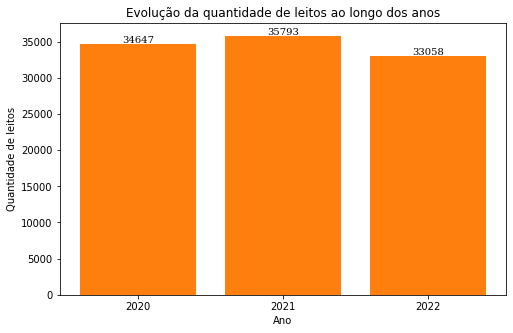

In [ ]:
# Agrupe os dados pelo ano
leitos_por_ano = todos.groupby(['level_1'])['CODLEITO'].count()

# Cria um background
fig, ax = plt.subplots(1,1, figsize=(8, 5))
ax.bar(leitos_por_ano.index, leitos_por_ano, width=0.5, 
       edgecolor='darkgray',
       linewidth=0.6)

# Configure os valores do eixo x
plt.xticks(anos)

# Plotar a quantidade de leitos por ano
plt.bar(leitos_por_ano.index, leitos_por_ano.values)
plt.xticks(leitos_por_ano.index, anos)
plt.xlabel('Ano')
plt.ylabel('Quantidade de leitos')
plt.title('Evolução da quantidade de leitos ao longo dos anos')



# Adiciona rótulos
for i in leitos_por_ano.index:
    ax.annotate(f"{leitos_por_ano[i]}", 
                   xy=(i, leitos_por_ano[i] + 500), #esta linha altera a altura do rótulo.
                   va = 'center', ha='center',fontweight='light', fontfamily='serif')

plt.show()

In [ ]:
# Armazenar o texto de resultado
resultado = ""

# Verificando os valores do dataframe
for i in range(1, len(leitos_por_ano)):
  # Calcule a alteração percentual em relação ao ano anterior
  alteracao = (leitos_por_ano.iloc[i] - leitos_por_ano.iloc[i-1]) / leitos_por_ano.iloc[i-1]
  # Resultado ao texto de resultado
  resultado += f"No ano de {leitos_por_ano.index[i]}, houve uma alteração de {alteracao:.2f}% em relação ao ano anterior.\n"

# Imprima o resultado
print(resultado)

No ano de 2021, houve uma alteração de 0.03% em relação ao ano anterior.
No ano de 2022, houve uma alteração de -0.08% em relação ao ano anterior.

